In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pybert as pb

In [3]:
# %% load data(sheme) container
data = pb.DataContainerERT('synth.shm')
print(data)

Data: Electrodes: 40 data: 728


15/07/22 - 13:58:01 - pyGIMLi - WARNING - Deprecated code usage at:
15/07/22 - 13:58:01 - pyGIMLi - WARNING - None.<cell line: 9>(C:\Users\Guenther.T\AppData\Local\Temp\ipykernel_14020\3046675505.py:9)
use createParaMeshPLC 


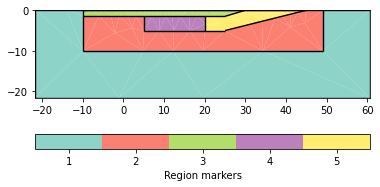

In [6]:
# %% create geometry (poly object)
dTop = -1.5
dSlag = -5.0
xLeft = -10
xRight = 30
xMid = 20
xSlag1 = 5
xSlag2 = 25
geo = mt.createParaDomain2D(data, paraDX=0.5, paraDepth=10,
                           paraBoundary=10, boundary=.3)  # first b=.3,later 3
topsoil = mt.createPolygon([[xLeft, 0], [xLeft, dTop],
                            [xSlag2, dTop], [xRight, 0]],
                           isClosed=True, marker=3)
slag1 = mt.createPolygon([[xSlag1, dTop], [xSlag1, dSlag], [xMid, dSlag],
                          [xMid, dTop]], isClosed=True, marker=4)
slag2 = mt.createPolygon([[xMid, dSlag], [xSlag2, dSlag], [45, 0], [xRight, 0],
                          [xSlag2, dTop], [xMid, dTop]], isClosed=True, marker=5)
plc = geo + topsoil + slag1 + slag2
pg.show(plc);

In [7]:
# We save the anomalies for later plotting lines on results
ano = topsoil + slag1 + slag2
ano.exportPLC("geo.poly")

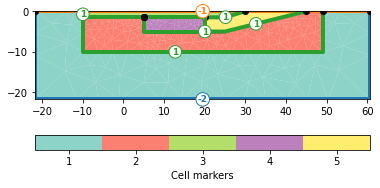

In [8]:
# %% mesh the geometry
mesh = mt.createMesh(plc)
pg.show(mesh, markers=True);

In [9]:
# the synthetic model
frvec = [0.156, 0.312, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 125,
         250, 500, 1000]  # SIP256C frequencies
fdip = pb.FDIP(f=frvec, data=data)
rho = np.array([100, 500, 500, 100, 200, 200])
m = np.array([0, 0, 0, 0, 0.8, 0.7])
tau = np.array([0, 0.001, 0.001, 0.001, 0.03, 0.3])
c = np.array([0, 0.25, 0.25, 0.25, 0.5, 0.5])

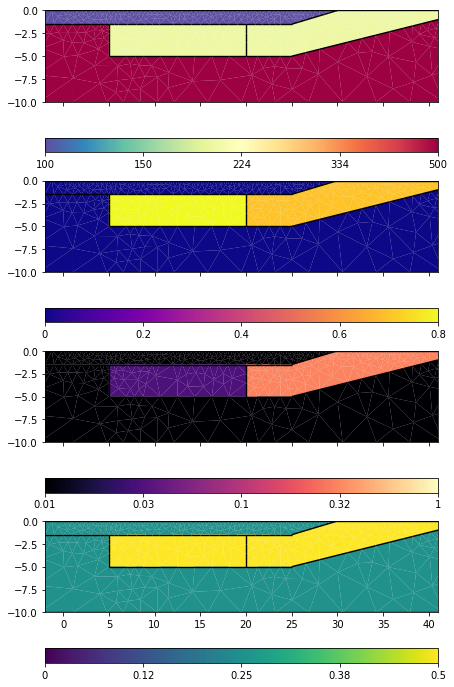

In [11]:
# %%
fig, ax = pg.plt.subplots(nrows=4, figsize=(8, 12), sharex=True, sharey=True)
cm = mesh.cellMarkers()
pg.show(mesh, rho[cm], ax=ax[0], cMin=100, cMax=500, logScale=True,
        cMap="Spectral_r")
pg.show(mesh, m[cm], ax=ax[1], cMin=0, cMax=0.8, logScale=0, cMap="plasma")
pg.show(mesh, tau[cm], ax=ax[2], cMin=0.01, cMax=1, logScale=1, cMap="magma")
pg.show(mesh, c[cm], ax=ax[3], cMin=0, cMax=0.5, logScale=0, cMap="viridis")
ax[0].set_xlim(-2, 41)
ax[0].set_ylim(-10, 0);

In [12]:
# now the actual simulation
fdip.simulate(mesh, rho, m, tau, c)

15/07/22 - 13:59:52 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:52 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:53 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:53 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:53 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:54 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:54 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:54 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:55 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:55 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:55 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:55 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:56 - pyGIMLi - INFO - Complex resistivity values found.
15/07/22 - 13:59:56 - pyGIMLi - INFO - Complex resi

(array([[109.929056  , 109.94995475, 109.978897  , ..., 110.62768979,
         110.68730784, 110.73289849],
        [114.68335833, 114.78363698, 114.92259159, ..., 118.03079543,
         118.31456875, 118.53143184],
        [131.65120723, 131.85436457, 132.13488619, ..., 137.96184236,
         138.45336837, 138.82590785],
        ...,
        [138.13262385, 129.66891158, 119.99536515, ...,  68.6216872 ,
          67.60186587,  66.90743392],
        [171.4330361 , 160.9040288 , 148.78863466, ...,  83.85509976,
          82.71156771,  81.95668913],
        [147.71705579, 138.38709812, 127.6962594 , ...,  69.82113317,
          68.54536046,  67.65941001]]),
 array([[-0.00041976, -0.00056586, -0.00074936, ..., -0.00133727,
         -0.00108859, -0.00085329],
        [-0.00192831, -0.00259819, -0.0034382 , ..., -0.00598409,
         -0.00485866, -0.00380088],
        [-0.00337764, -0.00452773, -0.00594997, ..., -0.00902573,
         -0.00724641, -0.0056212 ],
        ...,
        [ 0.126997

In [13]:
fdip.fitDataDecays()
fdip.saveData("synth")
fdip.generateDataPDF()
fdip.generateSpectraPDF()